In [72]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress


crypto_path = "resources/cleaned_crypto.csv"
gold_path = "resources/gold_monthly_csv.csv"

crypto_data = pd.read_csv(crypto_path,low_memory=False)
gold_data = pd.read_csv(gold_path)

crypto_data.head(10)


,Unnamed: 0,trade_date,volume,price_usd,market_cap,capitalization_change_1_day,USD_price_change_1_day,crypto_name,crypto_type,ticker,minable,trade_year,trade_month,trade_day
0,0,2016-01-01,36278900.0,434.33,6.529300e+09,0.000000,0.000000,Bitcoin,0.0,BTC,1.0,2016,1,1
1,1,2016-01-02,30096600.0,433.44,6.517390e+09,-0.001824,-0.002049,Bitcoin,0.0,BTC,1.0,2016,1,2
2,2,2016-01-03,39633800.0,430.01,6.467430e+09,-0.007666,-0.007913,Bitcoin,0.0,BTC,1.0,2016,1,3
3,3,2016-01-04,38477500.0,433.09,6.515713e+09,0.007466,0.007163,Bitcoin,0.0,BTC,1.0,2016,1,4
4,4,2016-01-05,34522600.0,431.96,6.500393e+09,-0.002351,-0.002609,Bitcoin,0.0,BTC,1.0,2016,1,5
5,5,2016-01-06,34042500.0,429.11,6.458942e+09,-0.006377,-0.006598,Bitcoin,0.0,BTC,1.0,2016,1,6
6,6,2016-01-07,87562200.0,458.05,6.896279e+09,0.067710,0.067442,Bitcoin,0.0,BTC,1.0,2016,1,7
7,7,2016-01-08,56993000.0,453.23,6.825700e+09,-0.010234,-0.010523,Bitcoin,0.0,BTC,1.0,2016,1,8
8,8,2016-01-09,32278000.0,447.61,6.742767e+09,-0.012150,-0.012400,Bitcoin,0.0,BTC,1.0,2016,1,9
9,9,2016-01-10,35995900.0,447.99,6.750440e+09,0.001138,0.000849,Bitcoin,0.0,BTC,1.0,2016,1,10


In [73]:
gold_data.head(10)

,Date,Price
0,1950-01,34.73
1,1950-02,34.73
2,1950-03,34.73
3,1950-04,34.73
4,1950-05,34.73
5,1950-06,34.73
6,1950-07,34.73
7,1950-08,34.73
8,1950-09,34.73
9,1950-10,34.73


In [74]:
#shorten the gold data

gold_data = gold_data[(gold_data['Date'] >= '2016-01') & (gold_data['Date'] <= '2021-09')]

gold_data.head(10)

,Date,Price
792,2016-01,1095.655
793,2016-02,1194.893
794,2016-03,1246.312
795,2016-04,1241.452
796,2016-05,1259.755
797,2016-06,1273.580
798,2016-07,1337.429
799,2016-08,1340.861
800,2016-09,1326.618
801,2016-10,1268.929


In [75]:
#check for null values, no null values

gold_data.count()

Date     55
Price    55
dtype: int64

In [76]:
#split the date by year, month for further merging

gold_data[['trade_year', 'trade_month']] = gold_data['Date'].str.split('-', expand=True)

gold_data['trade_year'] = gold_data['trade_year'].astype(int)
gold_data['trade_month'] = gold_data['trade_month'].astype(int)

gold_data.head(10)

,Date,Price,trade_year,trade_month
792,2016-01,1095.655,2016,1
793,2016-02,1194.893,2016,2
794,2016-03,1246.312,2016,3
795,2016-04,1241.452,2016,4
796,2016-05,1259.755,2016,5
797,2016-06,1273.580,2016,6
798,2016-07,1337.429,2016,7
799,2016-08,1340.861,2016,8
800,2016-09,1326.618,2016,9
801,2016-10,1268.929,2016,10


In [77]:
#Getting the Bitcoin dataframe
Bitcoin_data = crypto_data.loc[crypto_data["crypto_name"] == "Bitcoin"]

In [78]:
#Get the monthly average of market cap and value, set in a new dataframe

average_marketcap = Bitcoin_data.groupby(["trade_year","trade_month"]).agg({"market_cap" : "mean"})

average_price = Bitcoin_data.groupby(["trade_year","trade_month"]).agg({"price_usd" : "mean"})

bitcoin_df = pd.merge(average_marketcap, average_price, on=["trade_year","trade_month"])
bitcoin_df.head(20)


market_cap    price_usd
trade_year trade_month                           
2016       1            6.199337e+09   410.844839
           2            6.153136e+09   404.407931
           3            6.382954e+09   416.526452
           4            6.705691e+09   434.338333
           5            7.184704e+09   461.953871
           6            1.007109e+10   642.870333
           7            1.042300e+10   661.355806
           8            9.166796e+09   579.584839
           9            9.615324e+09   605.848333
           10           1.024937e+10   643.550000
           11           1.161133e+10   726.348667
           12           1.328893e+10   828.060000
2017       1            1.473620e+10   914.916452
           2            1.717599e+10  1062.533214
           3            1.831658e+10  1129.365161
           4            1.964093e+10  1206.641000
           5            3.096437e+10  1895.383548
           6            4.321693e+10  2636.204333
           7            4.145046e+10  2519.418387
           8            6.408403e+10  3880.990000

In [79]:
#merge bitcoin and gold dataframe together
g_b_df = pd.merge(bitcoin_df, gold_data, on=["trade_year","trade_month"])

#save the file
g_b_df.to_csv("bitcoin_gold.csv")

g_b_df.head(20)

,trade_year,trade_month,market_cap,price_usd,Date,Price
0,2016,1,6.199337e+09,410.844839,2016-01,1095.655
1,2016,2,6.153136e+09,404.407931,2016-02,1194.893
2,2016,3,6.382954e+09,416.526452,2016-03,1246.312
3,2016,4,6.705691e+09,434.338333,2016-04,1241.452
4,2016,5,7.184704e+09,461.953871,2016-05,1259.755
5,2016,6,1.007109e+10,642.870333,2016-06,1273.580
6,2016,7,1.042300e+10,661.355806,2016-07,1337.429
7,2016,8,9.166796e+09,579.584839,2016-08,1340.861
8,2016,9,9.615324e+09,605.848333,2016-09,1326.618
9,2016,10,1.024937e+10,643.550000,2016-10,1268.929


In [80]:
#clean the data

g_b_df = g_b_df[["Date","market_cap","price_usd","Price"]]

g_b_df = g_b_df.rename(columns={"price_usd": "Bitcoin_price", "Price": "Gold_price"})

g_b_df.head(10)

,Date,market_cap,Bitcoin_price,Gold_price
0,2016-01,6.199337e+09,410.844839,1095.655
1,2016-02,6.153136e+09,404.407931,1194.893
2,2016-03,6.382954e+09,416.526452,1246.312
3,2016-04,6.705691e+09,434.338333,1241.452
4,2016-05,7.184704e+09,461.953871,1259.755
5,2016-06,1.007109e+10,642.870333,1273.580
6,2016-07,1.042300e+10,661.355806,1337.429
7,2016-08,9.166796e+09,579.584839,1340.861
8,2016-09,9.615324e+09,605.848333,1326.618
9,2016-10,1.024937e+10,643.550000,1268.929


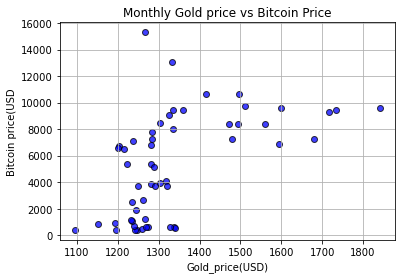

In [81]:
x = g_b_df["Gold_price"]
y = g_b_df["Bitcoin_price"]

plt.scatter(x,y,marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.grid(True)
plt.xlabel("Gold_price(USD)")
plt.ylabel("Bitcoin price(USD")
plt.title("Monthly Gold price vs Bitcoin Price")

#plt.savefig("./Image/City Latitude vs Temperature.png")
plt.show()

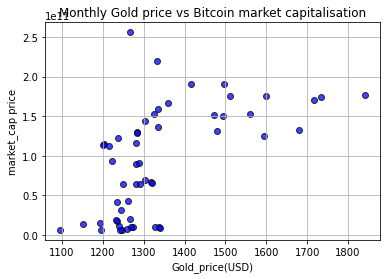

In [82]:
x = g_b_df["Gold_price"]
y = g_b_df["market_cap"]

plt.scatter(x,y,marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.grid(True)
plt.xlabel("Gold_price(USD)")
plt.ylabel("market_cap price")
plt.title("Monthly Gold price vs Bitcoin market capitalisation")

#plt.savefig("./Image/City Latitude vs Temperature.png")
plt.show()

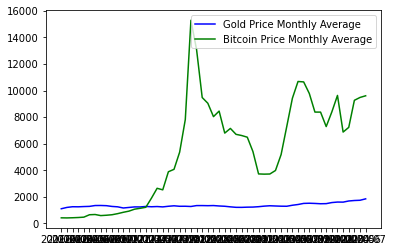

In [83]:
x = g_b_df["Date"]
y = g_b_df["Gold_price"]
z = g_b_df["Bitcoin_price"]

gold_ave, = plt.plot(x,y, color="blue", label="Gold Price Monthly Average" )
bit_ave, = plt.plot(x,z, color="green", label="Bitcoin Price Monthly Average" )

# Create a legend for our chart
plt.legend(handles=[gold_ave, bit_ave], loc="best")

# Show the chart
plt.show()